# 11. 반복측정 분산분석 (Repeated Measures ANOVA)

## 설정

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [7]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'fc-chache' is not recognized as an internal or external command,
operable program or batch file.


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [12]:
df = pd.read_csv('./data/08_1.RMA.csv', encoding = 'cp949')
df.head()

,id,시간,점수1,점수2,점수3
0,1,1,63,63,63
1,2,1,60,60,60
2,3,1,61,61,61
3,4,1,57,57,57
4,5,1,58,58,58


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      135 non-null    int64
 1   시간      135 non-null    int64
 2   점수1     135 non-null    int64
 3   점수2     135 non-null    int64
 4   점수3     135 non-null    int64
dtypes: int64(5)
memory usage: 5.4 KB


In [15]:
# 범주형 변수 처리

df['시간'].replace({1:'사전점수', 2:'중간점수', 3:'최종점수'}, inplace = True)
df['시간'] = df['시간'].astype('category')

df.head()

,id,시간,점수1,점수2,점수3
0,1,사전점수,63,63,63
1,2,사전점수,60,60,60
2,3,사전점수,61,61,61
3,4,사전점수,57,57,57
4,5,사전점수,58,58,58


In [17]:
df.groupby('시간')['점수1'].describe().round(3)

C:\Users\SikBread\AppData\Local\Temp\ipykernel_16984\4067330725.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('시간')['점수1'].describe().round(3)


,count,mean,std,min,25%,50%,75%,max
시간,,,,,,,,
사전점수,45.0,60.200,3.216,53.0,58.0,60.0,63.0,67.0
중간점수,45.0,60.956,3.796,53.0,58.0,60.0,64.0,70.0
최종점수,45.0,60.644,2.451,53.0,59.0,61.0,62.0,66.0


In [18]:
df.columns

Index(['id', '시간', '점수1', '점수2', '점수3'], dtype='object')

In [19]:
# 분석 변수가 여러 개일 때

num_feature = ['id', '시간', '점수1', '점수2', '점수3']

for num in num_feature:
    print("---", num, "---")
    results = df.groupby('시간')[num].describe().round(3)
    print(results, "\n")

--- id ---
      count  mean     std  min   25%   50%   75%   max
시간                                                    
사전점수   45.0  23.0  13.134  1.0  12.0  23.0  34.0  45.0
중간점수   45.0  23.0  13.134  1.0  12.0  23.0  34.0  45.0
최종점수   45.0  23.0  13.134  1.0  12.0  23.0  34.0  45.0 

--- 시간 ---
     count unique   top freq
시간                          
사전점수    45      1  사전점수   45
중간점수    45      1  중간점수   45
최종점수    45      1  최종점수   45 

--- 점수1 ---
      count    mean    std   min   25%   50%   75%   max
시간                                                      
사전점수   45.0  60.200  3.216  53.0  58.0  60.0  63.0  67.0
중간점수   45.0  60.956  3.796  53.0  58.0  60.0  64.0  70.0
최종점수   45.0  60.644  2.451  53.0  59.0  61.0  62.0  66.0 

--- 점수2 ---
      count    mean    std   min   25%   50%   75%   max
시간                                                      
사전점수   45.0  60.200  3.216  53.0  58.0  60.0  63.0  67.0
중간점수   45.0  60.956  3.796  53.0  58.0  60.0  64.0  70.0
최종점수   45.0  68

C:\Users\SikBread\AppData\Local\Temp\ipykernel_16984\2993546101.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('시간')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_16984\2993546101.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('시간')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_16984\2993546101.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default 

## 4. ANOVA (repeated Measures)

### 4.1 구형성이면서 차이가 없을 때

In [25]:
pg.rm_anova(dv = '점수1',
            within = '시간',
            subject='id',
            correction=False,
            data = df,
            detailed = True).round(3)  # 상세한 디테일 값이 나옴

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,시간,12.978,2,6.489,2.493,0.088,0.009,0.916
1,Error,229.022,88,2.603,NaN,NaN,NaN,NaN


p값: 0.08로 귀무가설 채택

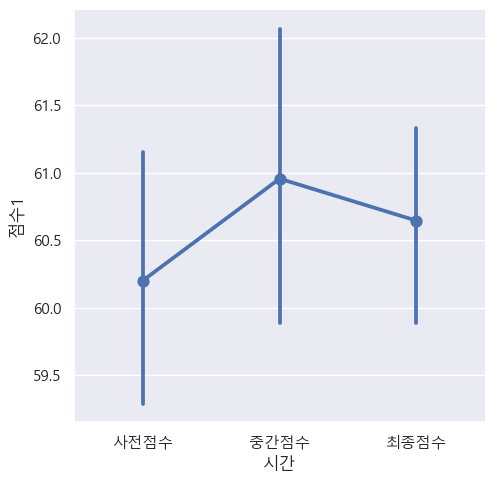

In [22]:
# 그래프

sns.catplot(x = '시간',
            y = '점수1',
            kind = 'point',
            data = df)

plt.show()

### 4.2 구형성이면서 차이가 있 때

In [24]:
pg.rm_anova(dv = '점수2',
            within = '시간',
            subject='id',
            correction=False,
            data = df,
            detailed = True).round(3)  # 상세한 디테일 값이 나옴

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,시간,1725.437,2,862.719,264.93,0.0,0.583,0.956
1,Error,286.563,88,3.256,NaN,NaN,NaN,NaN


p값: 0.0으로 차이가 있음

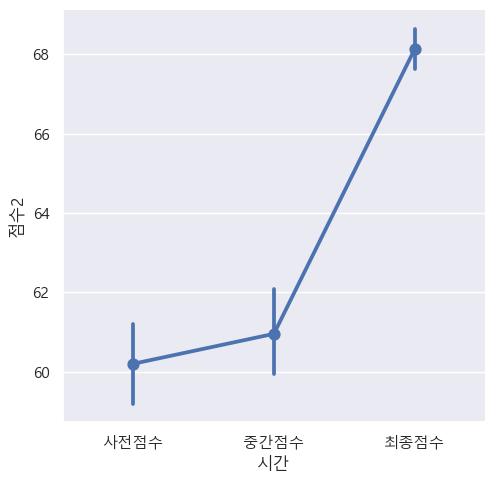

In [26]:
# 그래프

sns.catplot(x = '시간',
            y = '점수2',
            kind = 'point',
            data = df)

plt.show()

In [27]:
# 차이가 있으므로 사후성 검정 , post-hoc 분석

pg.pairwise_tests(dv = '점수2',
                  within = '시간',
                  subject = 'id',
                  data = df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,시간,사전점수,중간점수,True,True,-1.994,44.0,two-sided,0.052,0.983,-0.213
1,시간,사전점수,최종점수,True,True,-23.038,44.0,two-sided,0.000,9.047e+22,-3.006
2,시간,중간점수,최종점수,True,True,-17.307,44.0,two-sided,0.000,1.456e+18,-2.389


점수2는 사전-중간에서는 차이가 없음.

### 5.1 구형성 검정 방법

In [ ]:
# 구형이면 지금까지 분석한 것이 문제 없음
pg.sphericity(dv = '점수2',
                  within = '시간',
                  subject = 'id',
                  data = df)

#round(3) 안먹힘. 오류 남

SpherResults(spher=True, W=0.9545203020072753, chi2=2.001493749186882, dof=2, pval=0.36760478394340246)

spher= True, w 이 1에 가까우므로 구형성 검정 통과, pval 또한 0.05 이상으로 이를 뒷받침

### 5.2 구형성이 아닐 때 (Greenhouse-Geisser)

In [32]:
# 구형성 검정 탈락

pg.sphericity(dv = '점수3',
                  within = '시간',
                  subject = 'id',
                  data = df)

#round(3) 안먹힘. 오류 남 

SpherResults(spher=False, W=0.5076989303880011, chi2=29.14826654385579, dof=2, pval=4.683109812153781e-07)

spher = False

In [30]:
# 구형성이 아닐 때
# correction = True

pg.rm_anova(dv = '점수3',
            within = '시간',
            subject='id',
            correction = True,
            data = df,
            detailed = True).round(3)  # 상세한 디테일 값이 나옴

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,시간,1216.178,2,608.089,56.181,0.0,0.0,0.361,0.67,False,0.508,0.0
1,Error,952.489,88,10.824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


p-unc : 0.0, p-GG-corr: 0.00 귀무가설 기각, 연구가설 채택

### 5.3 구형성이 아닐 때 사후 검정

In [ ]:
# 구형성이 아닐 때 사후 검정

pg.sphericity(dv = '점수3',
            within = '시간',
            subject = 'id',
            data = df)

#round(3) 안먹힘. 오류 남 

SpherResults(spher=False, W=0.5076989303880011, chi2=29.14826654385579, dof=2, pval=4.683109812153781e-07)

### 6. 정규분포 검정

In [34]:
# 정규성 검정 건너뛰어도 됨.
# 정규분포 검정을 탈락했을 때 -> 비모수일 때 ; friedman으로 ANOVA

pg.friedman(dv = '점수3',
            within = '시간',
            subject = 'id',
            data = df).round(3)

,Source,W,ddof1,Q,p-unc
Friedman,시간,0.594,2,53.491,0.0
